<p style="font-family: Arial; font-size:1.4em;color:blue;">Compte rendu  </p>

<p style="font-family: Arial; font-size:1.4em;color:pink;">TP2 Interpolation Numérique  </p>

## Exercice 1

On considère le programme MATLAB suivant :
``` octave
function u=prog(x,y,c)
S = y; 
n = length(x); 
for j=1:n
    L = c-x; 
    for k=1:n
        if (k == j)
           L(k) = 1;
        else
           L(k) = L(k)/(x(j) - x(k));
        end 
    end 
    S(j) = S(j)*prod(L); 
end 
u=sum(S); 
```

$$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)(x-x_{n-1})}{(x_0-x_1)(x_0-x_2)(x_0-x_{n-1})}$

1) Que renvoie la fonction PR lorsqu'on lui déclare  x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))  et  y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))  deux vecteurs de même longueur  nn  et  cc  un nombre réel.

In [37]:
#la fonction pr:
from numpy import prod
def pr(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
        
    return  sum(S)

In [38]:

X=[1 ,2 ,3 ,4];
Y=[-1, 0, 2 ,1];
for i in X:
    print(pr(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0


10

2) Que contient le vecteur  LL  après la fin de la boucle  kk .

In [39]:
x=[1,2,3,4]
y=[-1,0,2,1]


In [40]:
from numpy import prod
def pr_2(x,y,c):
    S = [] 
    n = len(x)
    for c in x:
            for j in range(n):
                L =[c-xx for xx in x]
                for k in range(n):
                    if (k == j):                
                        L[k] = 1
                    else:
                        L[k] = L[k]/(x[j] - x[k])   
                S.append(y[j]*prod(L))

            return L



In [41]:
for i in x:
    print(pr_2(x,y,i))

[0.0, -0.5, -2.0, 1]
[0.0, -0.5, -2.0, 1]
[0.0, -0.5, -2.0, 1]
[0.0, -0.5, -2.0, 1]


3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

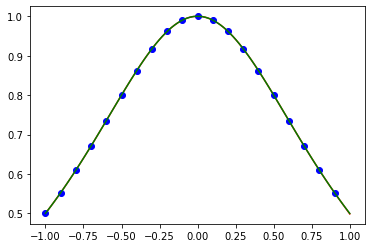

In [42]:
import numpy as np
import matplotlib.pyplot as plt

#x=[-1:0.1:1]
x=np.arange(-1,1,0.1)

f=lambda x: 1/(1+x**2)
y=f(x)
pt=[]
t=np.linspace(-1,1,100)
for u in range(len(t)):
    pt.append(pr(x,y,t[u]))

plt.plot(t,pt,'r',x,y,'bo',t,f(t),'g')
plt.show()

4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

[2.14159265 3.1300355  2.60129035]


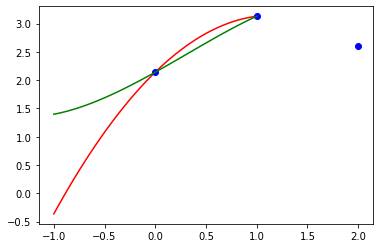

In [57]:
#x=[0:2];
#f=@(x) pi-cos(x/2)+x.*sqrt(1-(x/2).**2)
#y=f(x);

#for u=1 : length(t)
#pn(u)=PR(x,y,t(u));
#end
#plot(t,pn,'r',x,y,'bo',t,f(t),'g')
import math 
from numpy import linspace

x=np.arange(0,3)
f=lambda x: math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f_2=np.vectorize(f)
y=f_2(x)
print(y)
pn=[]
t=np.linspace(-1,1,100)
for u in range(len(t)):
     pn.append(pr(x,y,t[u]))

plt.plot(t,pn,'r',x,y,'bo',t,f_2(t),'g')
plt.show()
    


2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

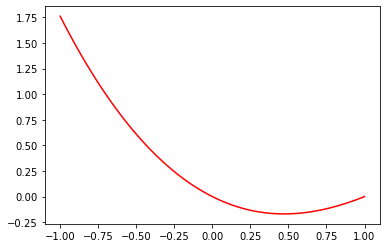

In [59]:
#x=[0:2];
#f=@(x) pi-cos(x/2)+x.*sqrt(1-(x/2).^2)
#y=f(x);

#for u=1 : length(t)
#pn(u)=PR(x,y,t(u));
#end
#plot(t,f(t)-pn,'r')


x=np.arange(0,3)
f=lambda x: math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f_2=np.vectorize(f)
y=f_2(x)
pn=[]
t=np.linspace(-1,1,100)
for u in range(len(t)):
     pn.append(pr(x,y,t[u]))

plt.plot(t,f_2(t)-pn,'r')
plt.show()
    


## Exercice 2  ( Phenomène de Runge )

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

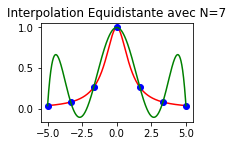

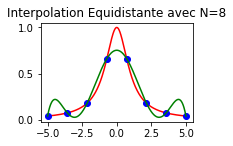

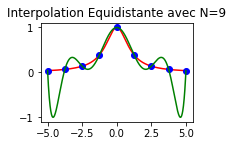

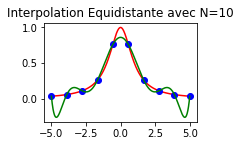

In [45]:
#pour n=7
n=7
x=np.linspace(-5,5,n)
f=lambda x: 1/(1+x**2)
y=f(x)
p=np.polyfit(x,y,n-1)
t=linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',x,y,'ob',t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")
plt.show()

#pour n=8
n=8
x=np.linspace(-5,5,n)
f=lambda x: 1/(1+x**2)
y=f(x)
p=np.polyfit(x,y,n-1)
t=linspace(-5,5,1000)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',x,y,'ob',t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=8")
plt.show()

#pour n=9
n=9
x=np.linspace(-5,5,n)
f=lambda x: 1/(1+x**2)
y=f(x)
p=np.polyfit(x,y,n-1)
t=linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',x,y,'ob',t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")
plt.show()

#pour n=10
n=10
x=np.linspace(-5,5,n)
f=lambda x: 1/(1+x**2)
y=f(x)
p=np.polyfit(x,y,n-1)
t=linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',x,y,'ob',t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")
plt.show()

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [89]:
def tcheb(a,b,n):
    v=[]
    for k in range(n):
        v.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi)) 
    return v 
tcheb(-5,5,11)

[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


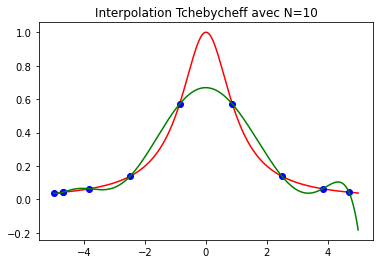

E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


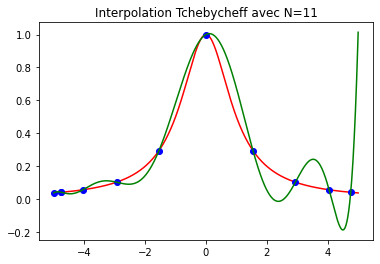

E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


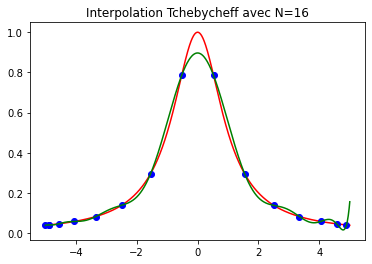

E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


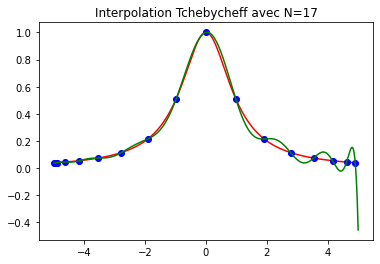

In [93]:
#pour n=10
n=10
yt=[]
f=lambda x: 1/(1+x**2)
xt=tcheb(-5,5,n)
for i in xt:
    yt.append(f(i))
    
pt=np.polyfit(xt,yt,n-1)
#plt.subplot(2,2,1)
plt.plot(t,f(t),'r',xt,yt,'ob',t,np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=10")
plt.show()

#pour n=11
n=11
yt=[]
f=lambda x: 1/(1+x**2)
xt=tcheb(-5,5,n)
for i in xt:
    yt.append(f(i))
    
pt=np.polyfit(xt,yt,n-1)
#plt.subplot(2,2,2)
plt.plot(t,f(t),'r',xt,yt,'ob',t,np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=11")
plt.show()

#pour n=16
n=16
yt=[]
f=lambda x: 1/(1+x**2)
xt=tcheb(-5,5,n)
for i in xt:
    yt.append(f(i))
    
pt=np.polyfit(xt,yt,n-1)
#plt.subplot(2,2,3)
plt.plot(t,f(t),'r',xt,yt,'ob',t,np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=16")
plt.show()

#pour n=17
n=17
yt=[]
f=lambda x: 1/(1+x**2)
xt=tcheb(-5,5,n)
for i in xt:
    yt.append(f(i))
    
pt=np.polyfit(xt,yt,n-1)
#plt.plot(2,2,4)
plt.plot(t,f(t),'r',xt,yt,'ob',t,np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=17")
plt.show()

On considère les deux programme MATLAB suivant :
``` octave
function f=intN(x,f)% RECURSIVE
m=length(x);
for k=2:m;
    f(k:m)=(f(k:m)-f(k-1:m-1))./(x(k:m)-x(1:m+1-k))
end
``` 
``` octave
function p=intNval(x,c,t)
m=length(x);
p=c(m)*ones(size(t));
for k=m-1:-1:1;
    p=p.*(t-x(k))+c(k);
end
```

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

In [99]:
#function f=intN(x,y)
#m=length(x);
#    for k=2:m
 #   f(k:m)=(y(k:m)-y(k-1:m-1))./(x(k:m)-x(1:m+1-k));
 #   end
#end
#python
def intN(x,y):
    m=len(x)
    k=2
    f=[]
    for k in range(m):
        f.append((y[k,m]-y[k-1,m-1])/(x[k:m]-x[1:m+1-k]))
    return f 


In [98]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)

TypeError: tuple indices must be integers or slices, not tuple

In [49]:
#function p=intNval(x,y,t)
#m=length(x);
#p=y(m)*ones(size(t));
#for k=m-1:-1:1
#    p=p.*(t-x(k))+y(k);
#end
#end

def intNval(x,y,t):
    m=len(x)
    p=y(m)*np.ones(np.size(t))
    k=[m-1,-1,1]
    for i in range(k):
        p.append(p*(t-x[k])+y[k])
    return p 

In [50]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
f=intNval(x,y,t)

TypeError: 'list' object is not callable

In [51]:
##Calcul a la main

2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

In [52]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)
plot(x,f,'r',x,y,'ob')

TypeError: list indices must be integers or slices, not tuple

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

In [53]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p(1)

TypeError: 'list' object is not callable

4) Recalculer à la main et puis à l'aide du Programme neville la valeur de $P(1)$.